<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

# ${\textbf{Customer Analytics Segmentation}}$

 </div>

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

		Variable	Data type	Range	Description	
		ID	numerical	Integer	Shows a unique identificator of a customer.	
				
		**Sex**	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.			
				0	male			
				1	female			
						
		**Marital status**	categorical	{0,1}	Marital status of a customer.			
				0	single			
				1	non-single (divorced / separated / married / widowed)			
						
		**Age**	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset	
				18	Min value (the lowest age observed in the dataset)			
				76	Max value (the highest age observed in the dataset)			
						
		**Education**	categorical	{0,1,2,3}	Level of education of the customer			
				0	other / unknown			
				1	high school			
				2	university			
				3	graduate school			
						
		**Income**	numerical	Real	Self-reported annual income in US dollars of the customer.			
				35832	Min value (the lowest income observed in the dataset)			
				309364	Max value (the highest income observed in the dataset)			
						
		**Occupation**	categorical	{0,1,2}	Category of occupation of the customer.			
				0	unemployed / unskilled			
				1	skilled employee / official			
				2	management / self-employed / highly qualified employee / officer			
						
		**Settlement size**	categorical	{0,1,2}	The size of the city that the customer lives in.	
				0	small city	
				1	mid-sized city	
				2	big city	


<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Import Libraries}}$

 </div>

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Load Data}}$
 </div>



In [4]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('../data/segmentation data.csv', index_col = 0)



<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Explore Data}}$
 </div>


In [6]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight. 
# We do not apply any transformations or changes to the data.
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


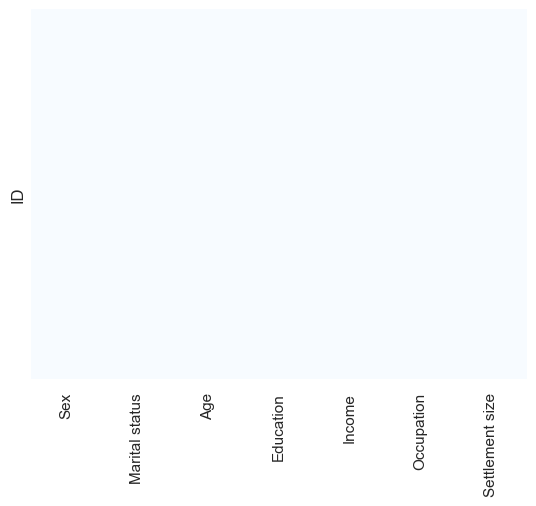

In [9]:
# Missing values?
sns.heatmap(df_segmentation.isnull(), yticklabels=False, cbar=False, cmap="Blues");

In [11]:
# Are there duplicated values?
df_segmentation.duplicated().sum()

0

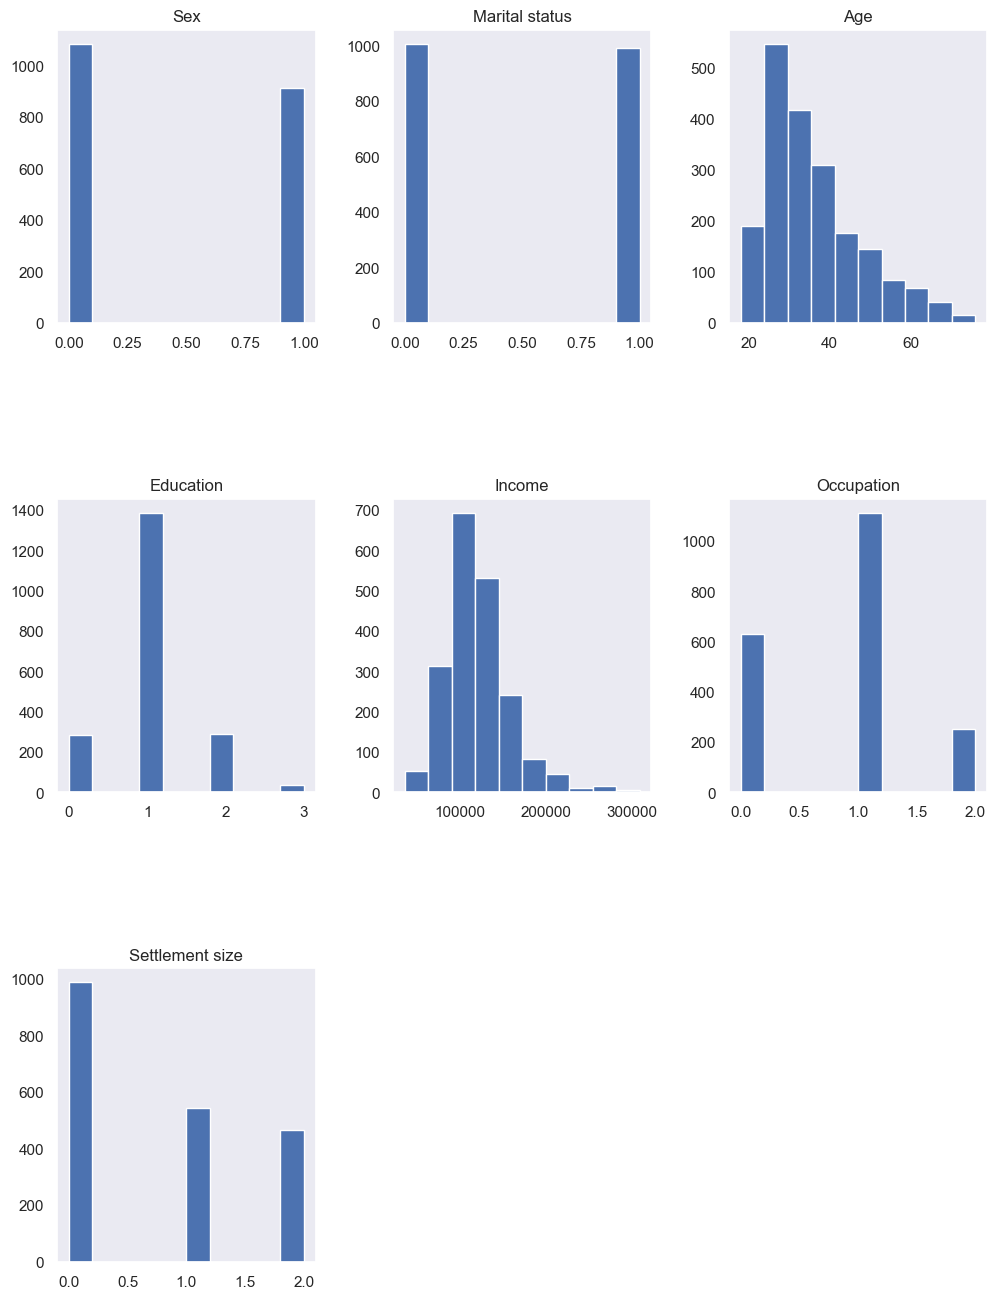

In [14]:
# plot histograms for all numeric columns
df_segmentation.hist(bins=10, figsize=(12,16), grid=False,layout=(len(df_segmentation.columns)//3+1, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Contraste de normalidad}}$
 </div>

* H0: La distribucion de la variable aleatoria **tiene** una distribución normal
* H1: La distribucion de la variable aleatoria **no tiene** una distribución normal

In [81]:
def diagmostic_shapiro(df,variable):
    # Histograma
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    sns.histplot(df[variable], kde=True)
    # Grafico QQ-plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm",plot=plt)
    plt.title("Gráfico Q-Q")
    plt.show()
    # Contraste de normalidad para una determinada variable
    feature = df[variable]
    stat, p = stats.shapiro(feature)
    print(f"Estadístico de Shapiro: {stat:.4f}")
    print(f"P-valor: {p:.4f}")
    if p > 0.05:
        print("No se rechaza la hipótesis nula de igualdad de distribuciones")
    else:
        print("Se rechaza la hipótesis nula de igualdad de distribuciones")

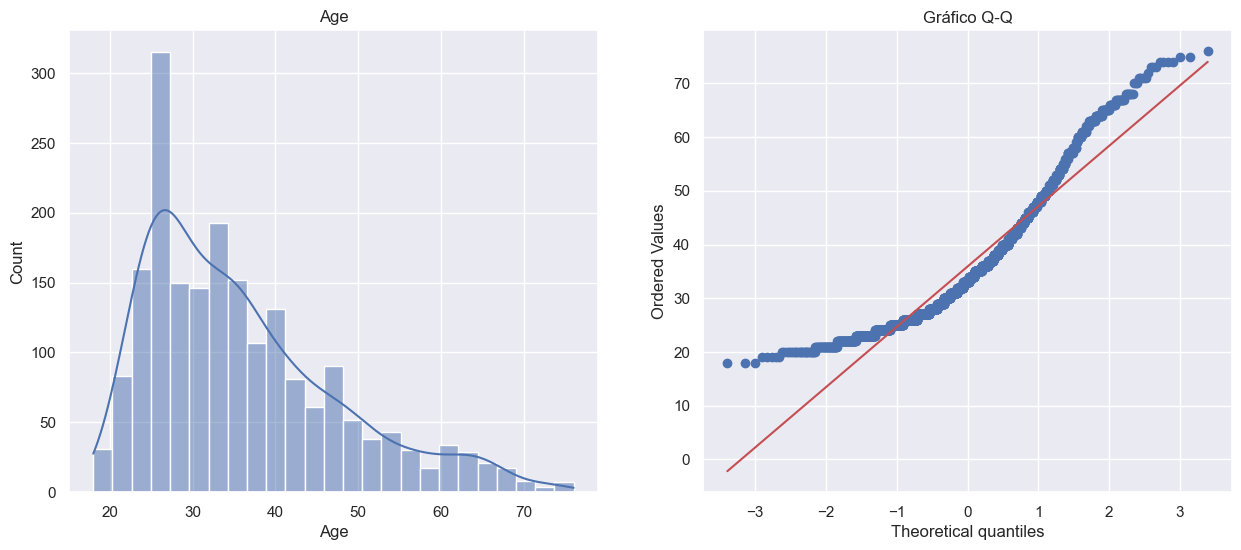

Estadístico de Shapiro: 0.9157
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [82]:
diagmostic_shapiro(df_segmentation, 'Age') # using shapiro

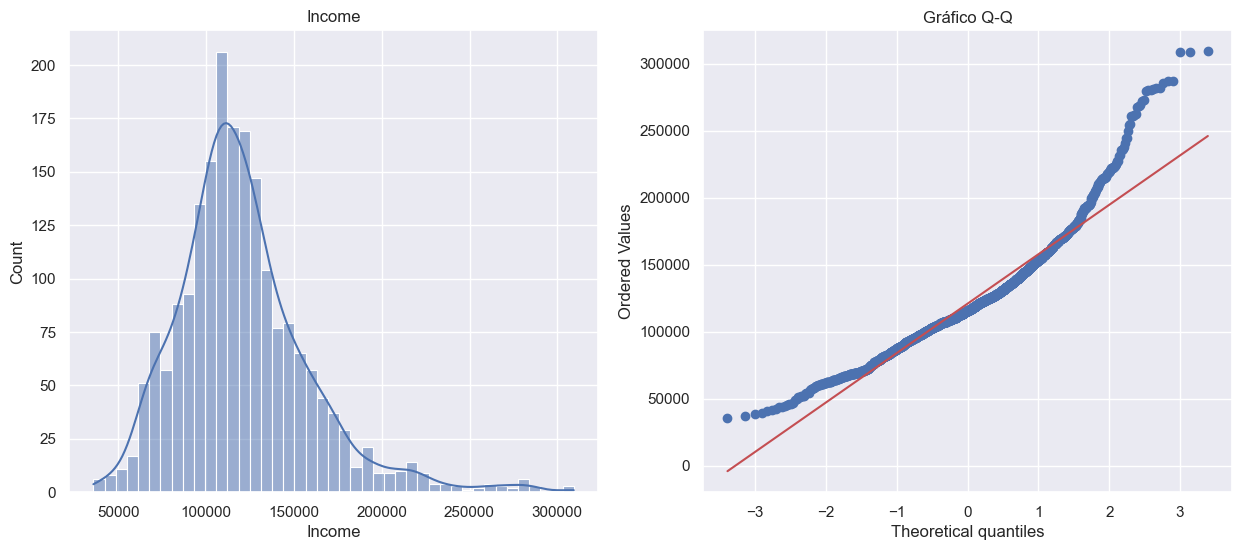

Estadístico de Shapiro: 0.9340
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [83]:
diagmostic_shapiro(df_segmentation, 'Income')

In [84]:
def diagmostic_kolmogorov(df,variable):
    # Histograma
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    sns.histplot(df[variable], kde=True)
    # Grafico QQ-plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm",plot=plt)
    plt.title("Gráfico Q-Q")
    plt.show()
    # Contraste de normalidad para una determinada columna
    feature = df[variable]
    # Usar 'norm' como distribución teórica y obtener el estadístico y el valor p
    stat = stats.kstest(feature, 'norm').statistic
    p = stats.kstest(feature, 'norm').pvalue
    print(f"Estadístico de Kolmogorov-Smirnov: {stat:.4f}")
    print(f"P-valor: {p:.4f}")
    # Usar un nivel de significancia de 0.05
    alpha = 0.05
    if p > alpha:
        print("No se rechaza la hipótesis nula de normalidad")
    else:
        print("Se rechaza la hipótesis nula de normalidad")


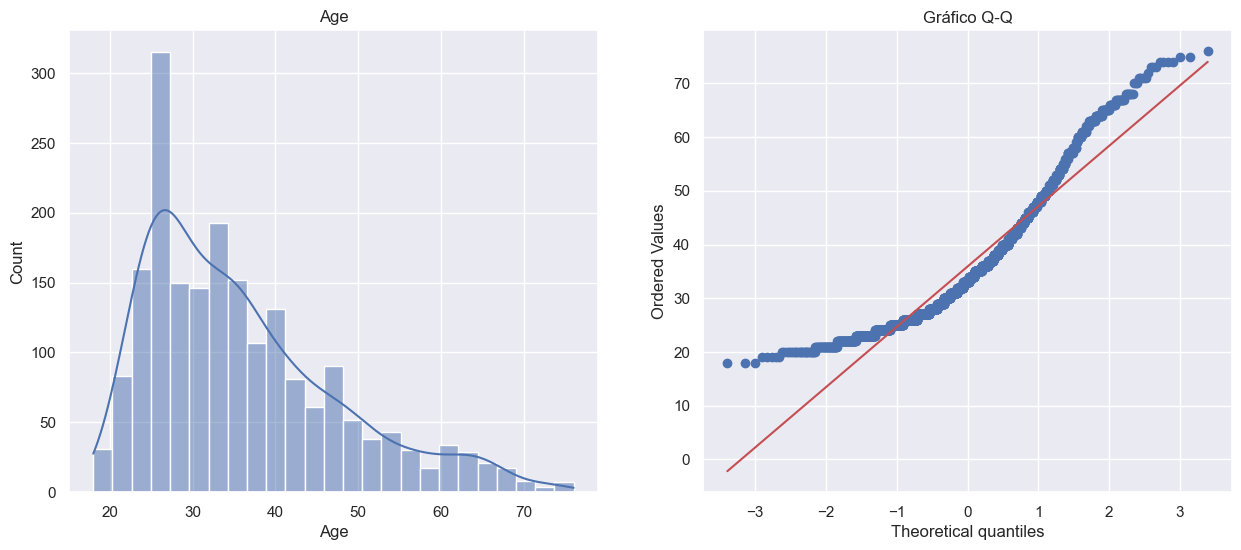

Estadístico de Kolmogorov-Smirnov: 1.0000
P-valor: 0.0000
Se rechaza la hipótesis nula de normalidad


In [85]:
diagmostic_kolmogorov(df_segmentation, 'Age')

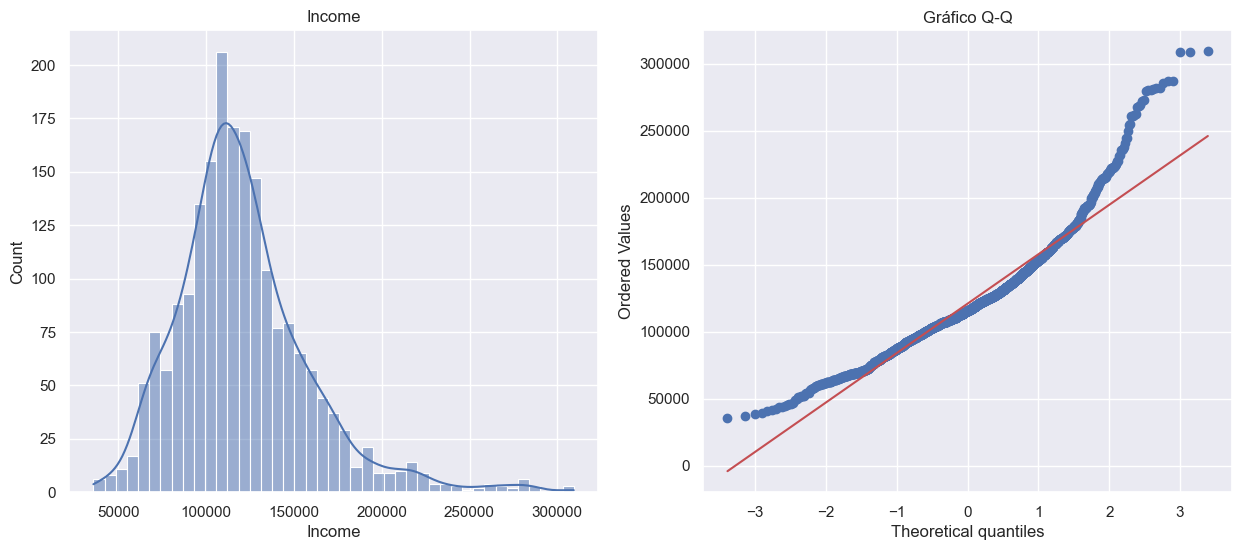

Estadístico de Kolmogorov-Smirnov: 1.0000
P-valor: 0.0000
Se rechaza la hipótesis nula de normalidad


In [86]:
diagmostic_kolmogorov(df_segmentation, 'Income')

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Transformations}}$
 </div>

In [99]:
#df_segmentation["Income_transf_log"] = np.sqrt(df_segmentation["Income"]) # transformacion log
#df_segmentation["age_transf_cub"] = np.cbrt(df_segmentation["Age"]) # cubica

from scipy.stats import boxcox
df_segmentation["Income_boxcox"] = boxcox(df_segmentation["Income"], 0.5)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Income_boxcox
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,704.172783
100000002,1,1,22,1,150773,1,2,774.589982
100000003,0,0,49,1,89210,0,0,595.360862
100000004,0,0,45,1,171565,1,1,826.408112
100000005,0,0,53,1,149031,1,1,770.090668


In [113]:
df_segmentation["Age_log"] = np.log(df_segmentation["Age"])
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Income_boxcox,Age_log
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,704.172783,4.204693
100000002,1,1,22,1,150773,1,2,774.589982,3.091042
100000003,0,0,49,1,89210,0,0,595.360862,3.891820
100000004,0,0,45,1,171565,1,1,826.408112,3.806662
100000005,0,0,53,1,149031,1,1,770.090668,3.970292


In [112]:
#del df_segmentation["Age_boxcox"]

In [213]:
from sklearn.preprocessing import PowerTransformer
p_scaler = PowerTransformer(method='box-cox')
cox = pd.DataFrame(p_scaler.fit_transform(df_segmentation[['Age','Income']]), columns=['Age','Income'])
cox.head()

,Age,Income
0,1.919207,0.239544
1,-1.608382,0.869781
2,1.169521,-0.846120
3,0.937775,1.303766
4,1.372050,0.830969


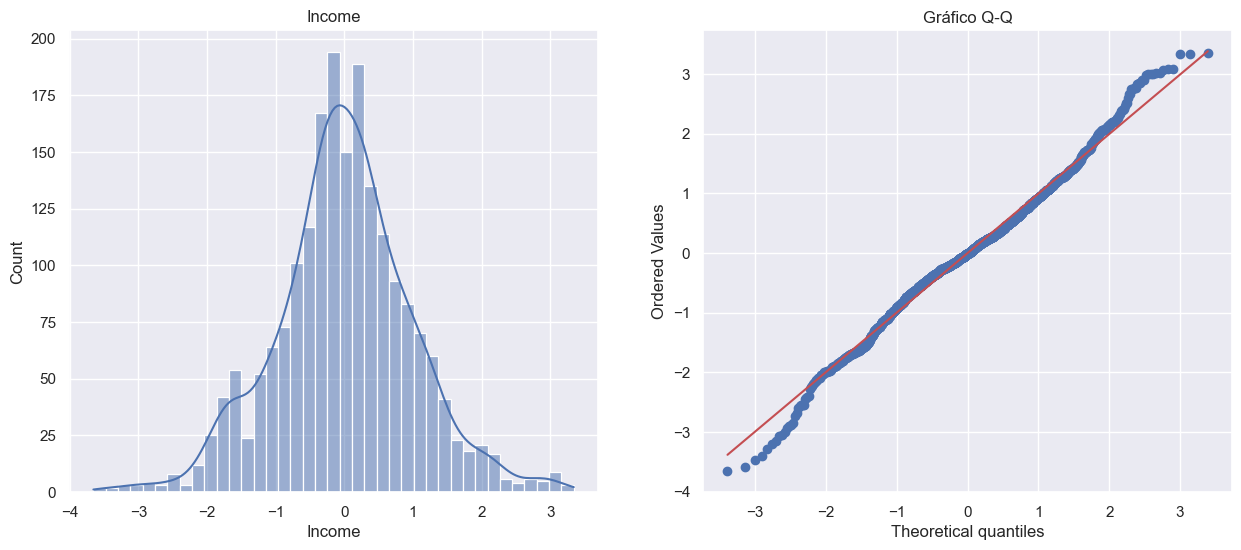

Estadístico de Shapiro: 0.9912
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [217]:
diagmostic_shapiro(cox, 'Income')

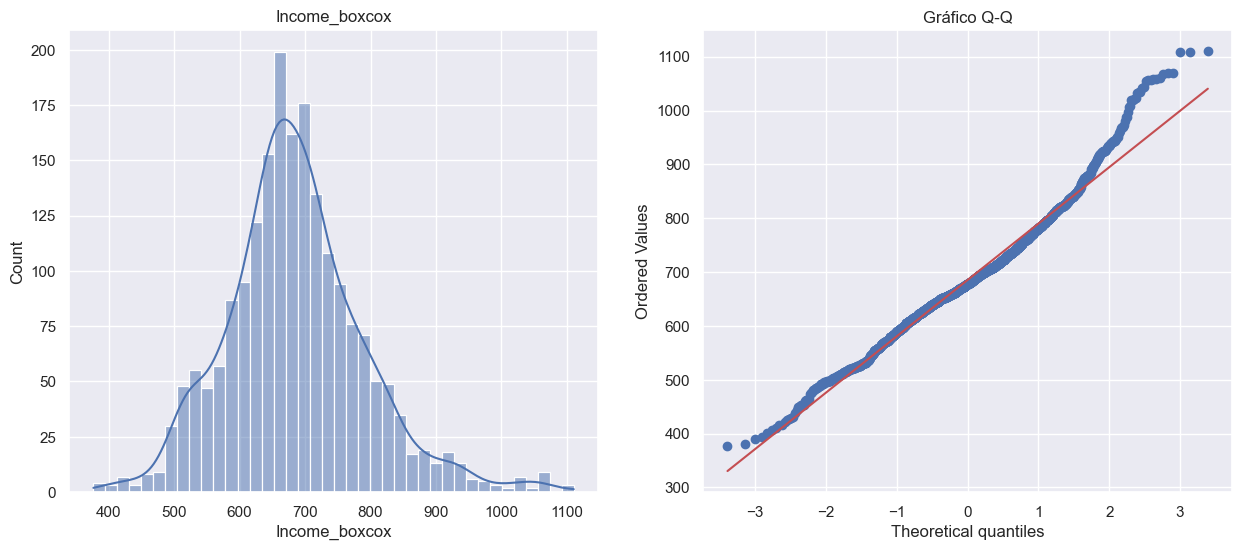

Estadístico de Shapiro: 0.9788
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [102]:
diagmostic_shapiro(df_segmentation, 'Income_boxcox')

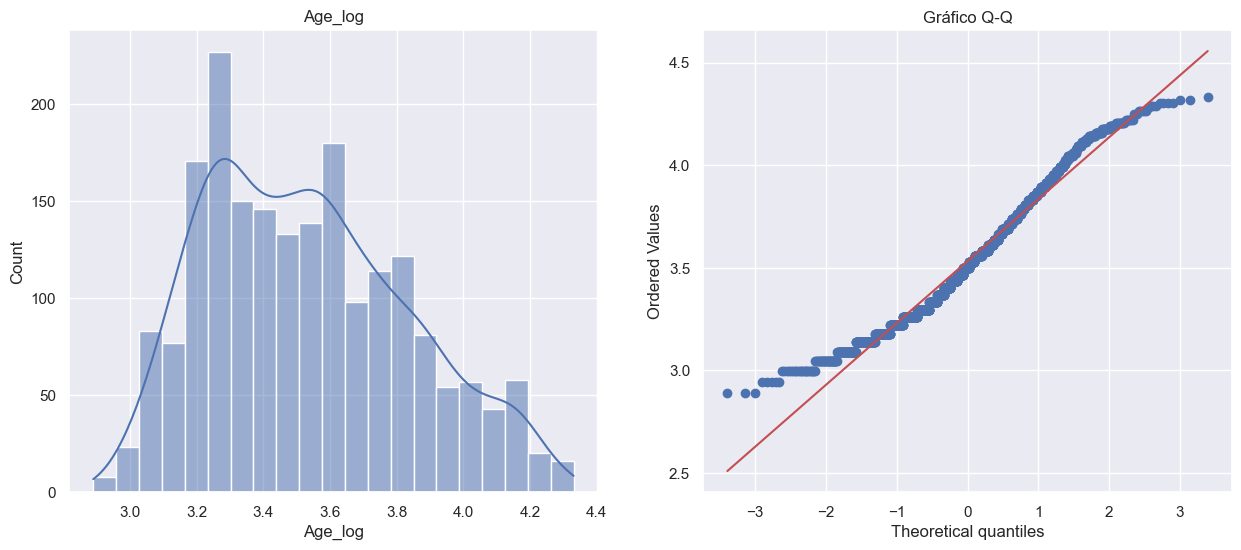

Estadístico de Shapiro: 0.9726
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [132]:
diagmostic_shapiro(df_segmentation, 'Age_log')

In [134]:
del df_segmentation['Age_log']
del df_segmentation['Income_boxcox']

In [135]:
# Importar librería
from sklearn.preprocessing import RobustScaler

# Crear el objeto Robust Scaler
scaler = RobustScaler()

# Ajustar y transformar el dataframe
df_segmentation_scaled = scaler.fit_transform(df_segmentation)

# Convertir el resultado en un nuevo dataframe
df_segmentation_scaled = pd.DataFrame(df_segmentation_scaled, columns=df_segmentation.columns)

In [136]:
df_segmentation_scaled.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,2.266667,1.0,0.225729,0.0,1.0
1,1.0,1.0,-0.733333,0.0,0.871699,0.0,1.0
2,0.0,0.0,1.066667,0.0,-0.651798,-1.0,-1.0
3,0.0,0.0,0.800000,0.0,1.386238,0.0,0.0
4,0.0,0.0,1.333333,0.0,0.828590,0.0,0.0


<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Análisis Bivariado}}$
 </div>

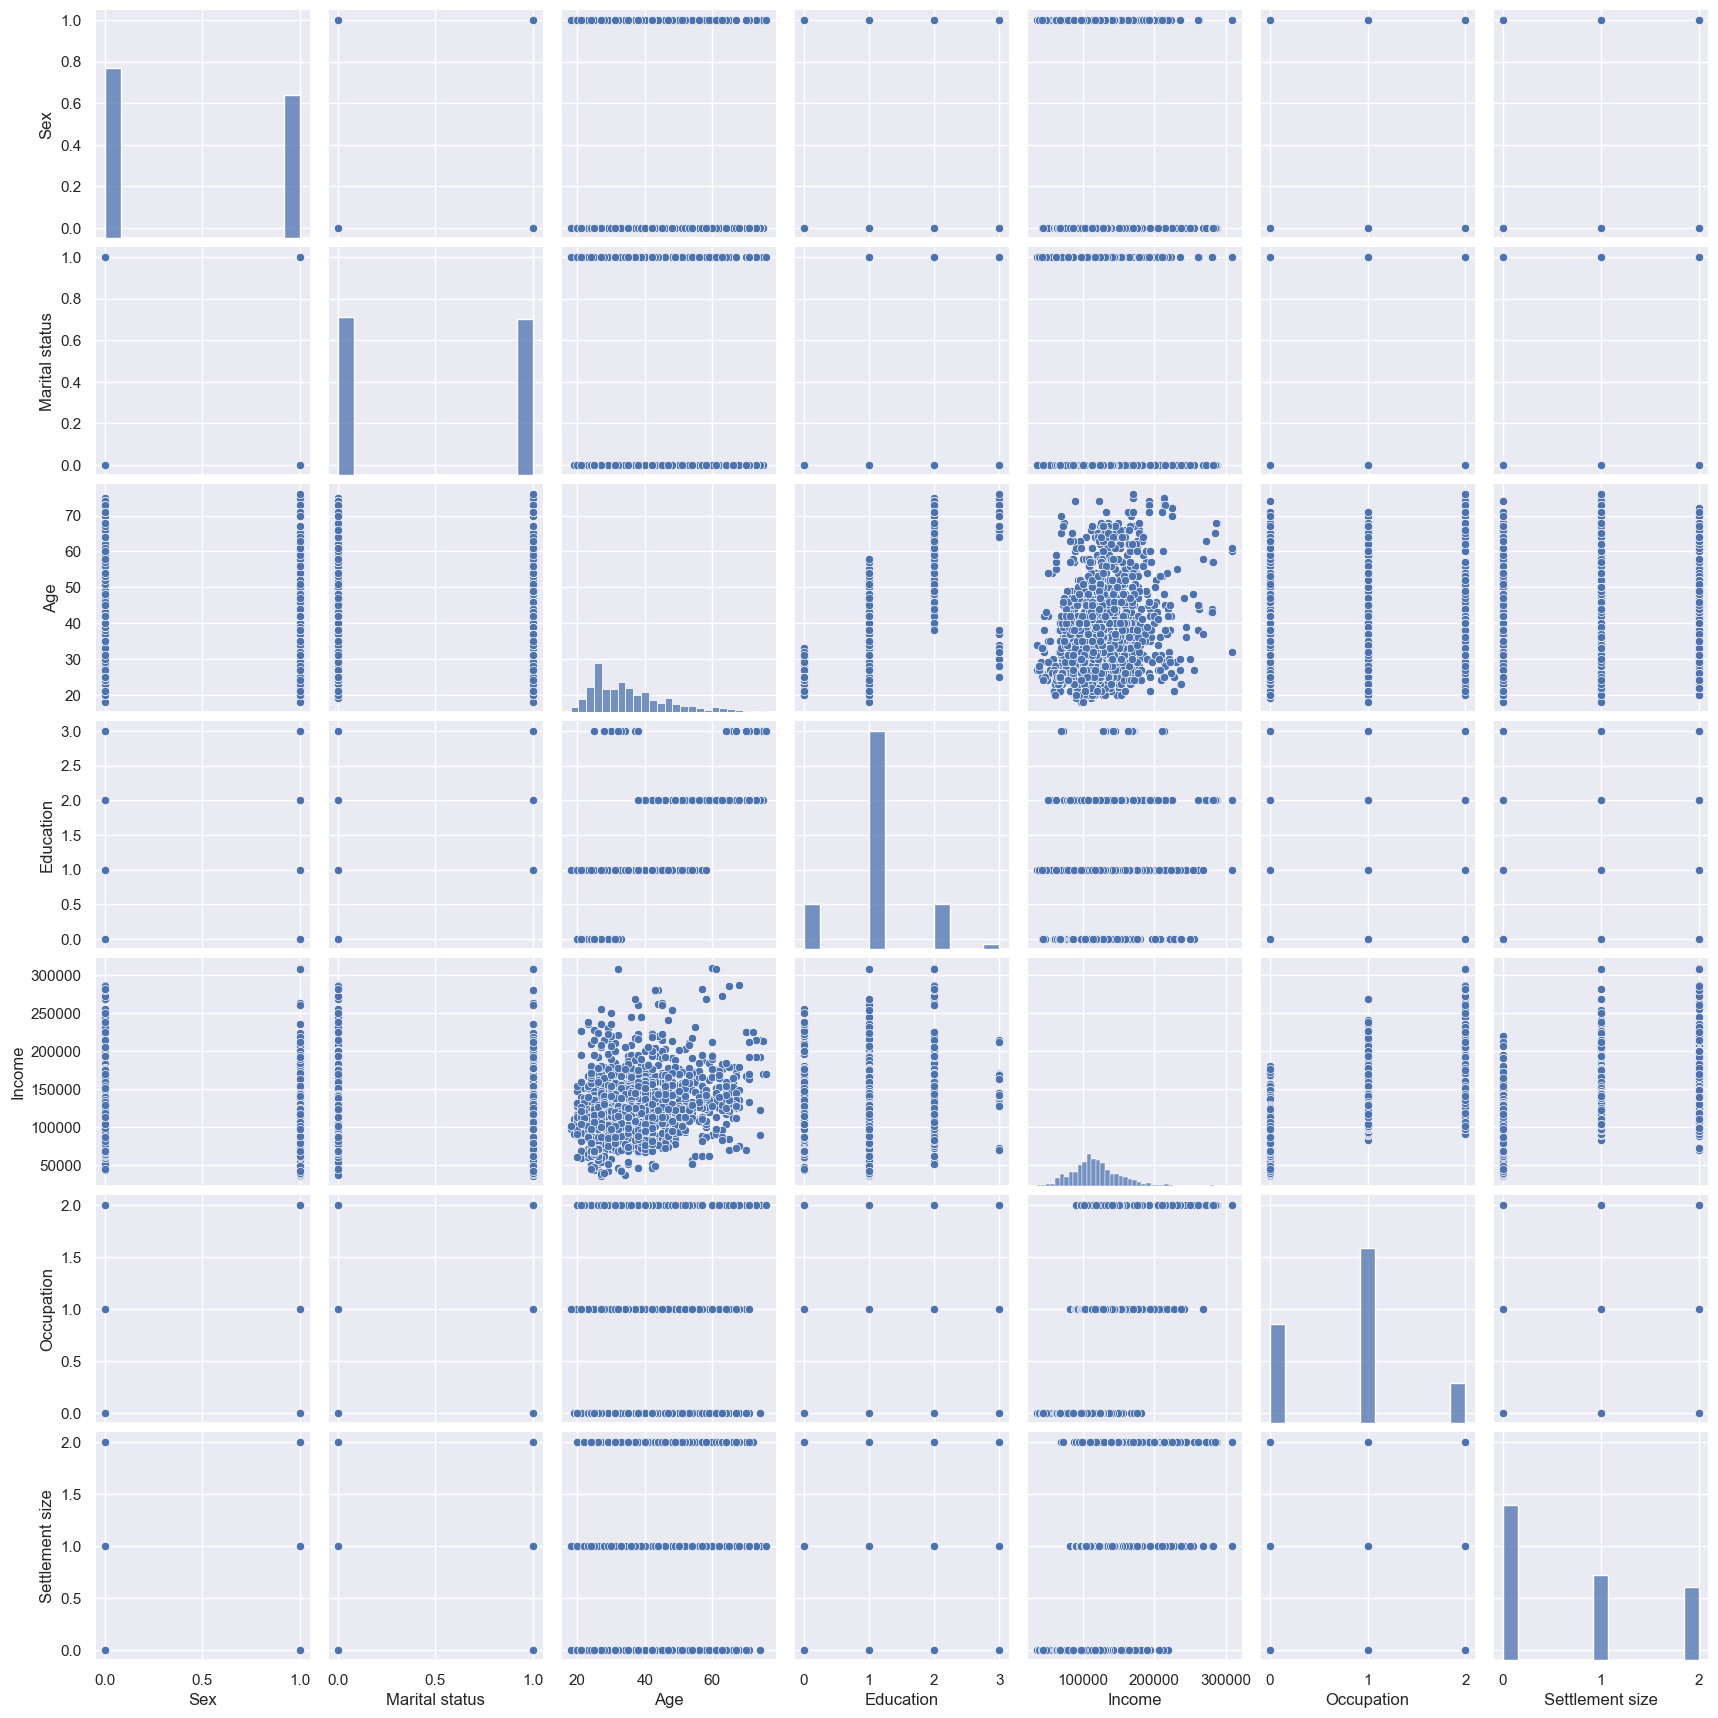

In [19]:
sns.pairplot(df_segmentation_scaled)

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Detección de outliers}}$
 </div>

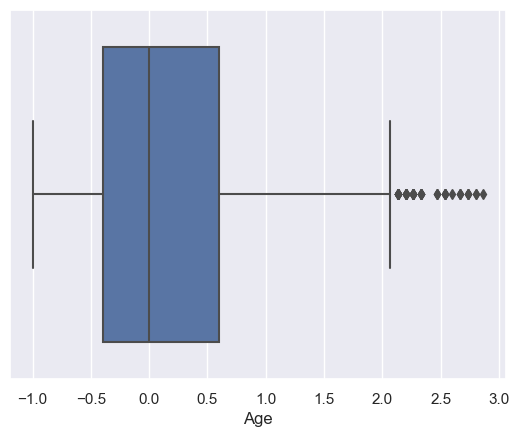

In [148]:
sns.boxplot(x=df_segmentation_scaled['Age']);

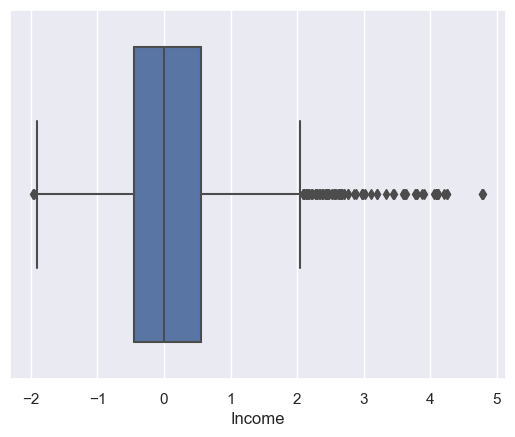

In [149]:
sns.boxplot(x=df_segmentation_scaled['Income']);

In [139]:
def replace_outliers_with_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].mask(df[col] < lower_bound, lower_bound)
    df[col] = df[col].mask(df[col] > upper_bound, upper_bound)
    return df

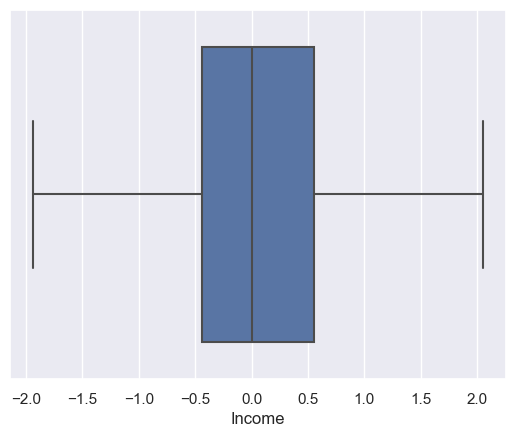

In [150]:
df_copy = df_segmentation_scaled.copy()
df = replace_outliers_with_iqr(df_copy, 'Income')
sns.boxplot(x=df['Income']);

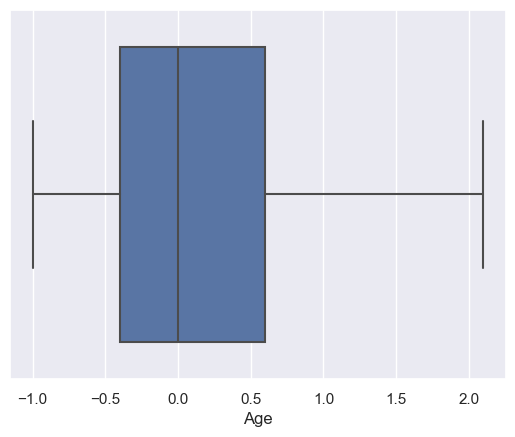

In [151]:
df = replace_outliers_with_iqr(df, 'Age')
sns.boxplot(x=df['Age']);

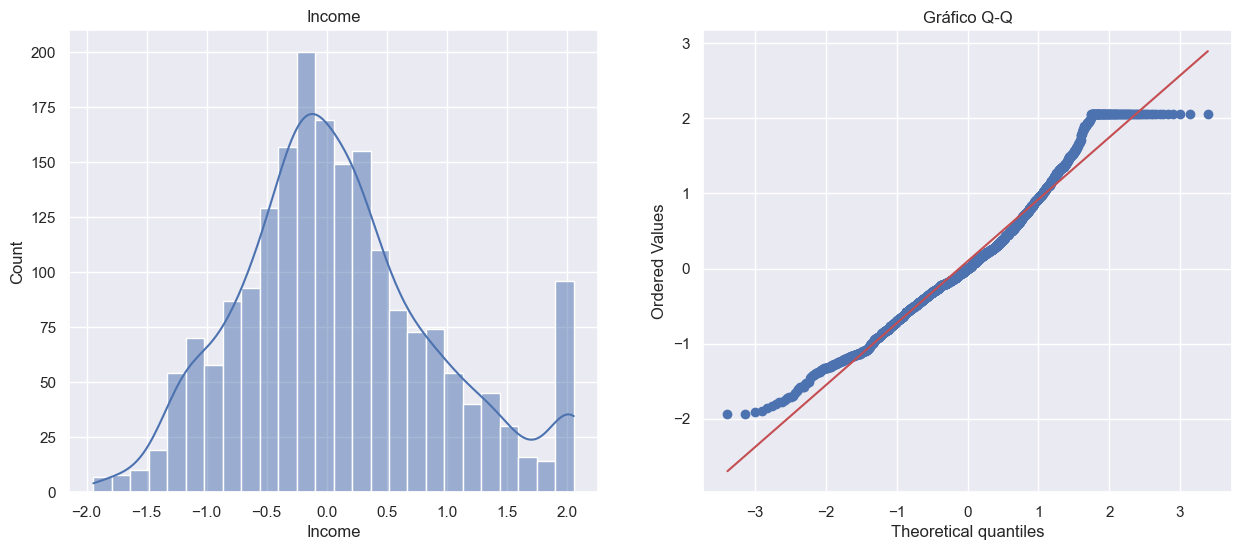

Estadístico de Shapiro: 0.9754
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [152]:
diagmostic_shapiro(df, 'Income')

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Correlation Estimate}}$
 </div>

In [153]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation_scaled.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


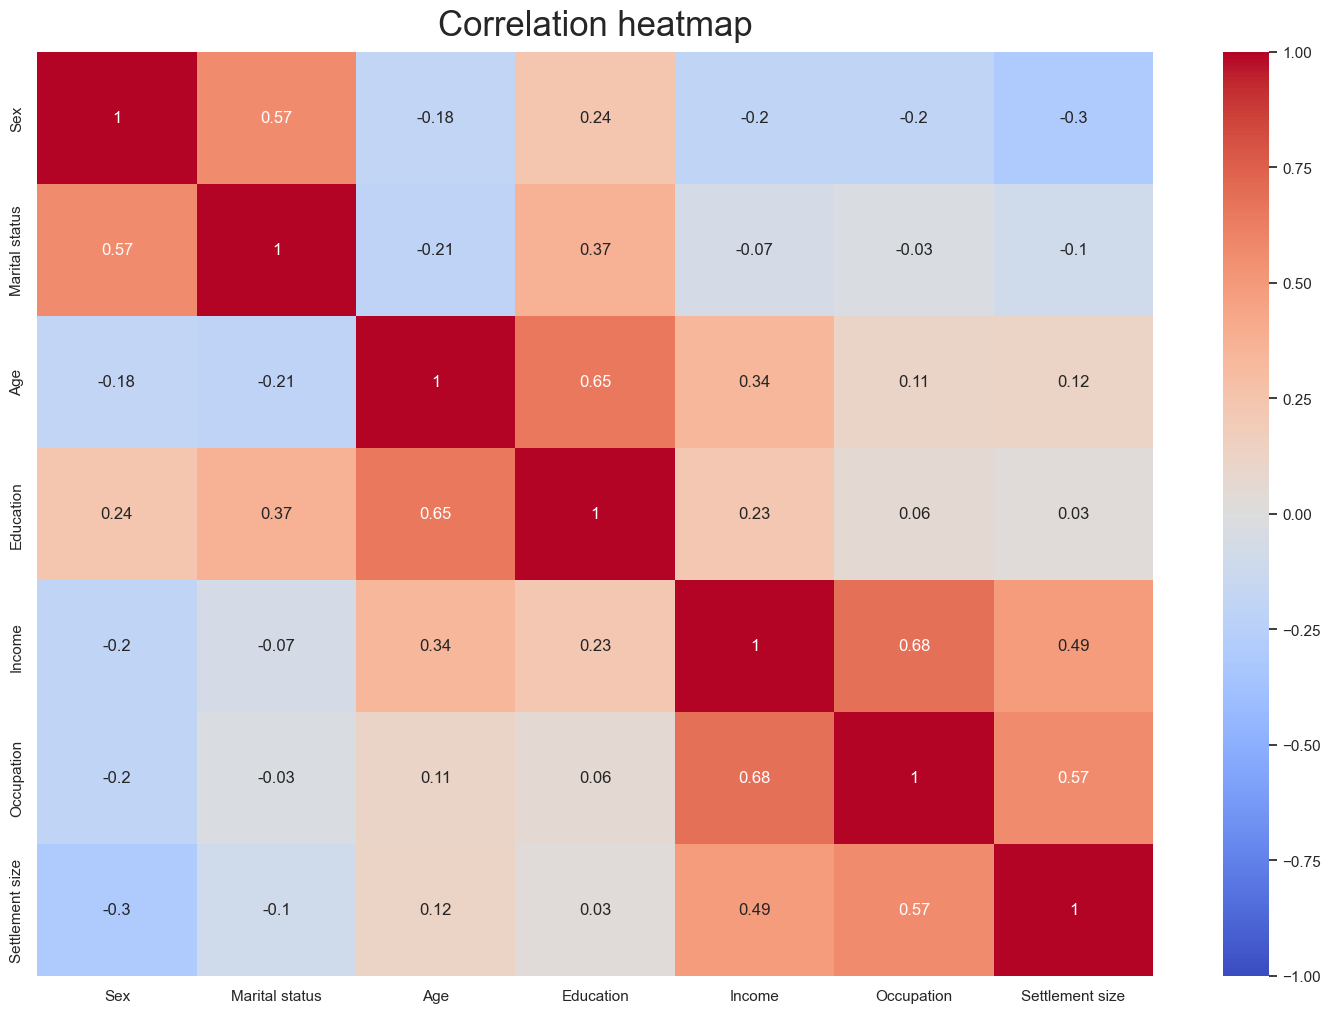

In [154]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
# In this case they will be -0,25 to 0,68, as they are the minumum and maximum correlation indeces between our features.
plt.figure(figsize=(18, 12))
corr = df_segmentation_scaled.corr().round(2)
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)#, mask=mask)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':25}, pad=12)
plt.show()

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Visualize Raw Data}}$
 </div>

Text(0.5, 1.0, 'Visualization of raw data')

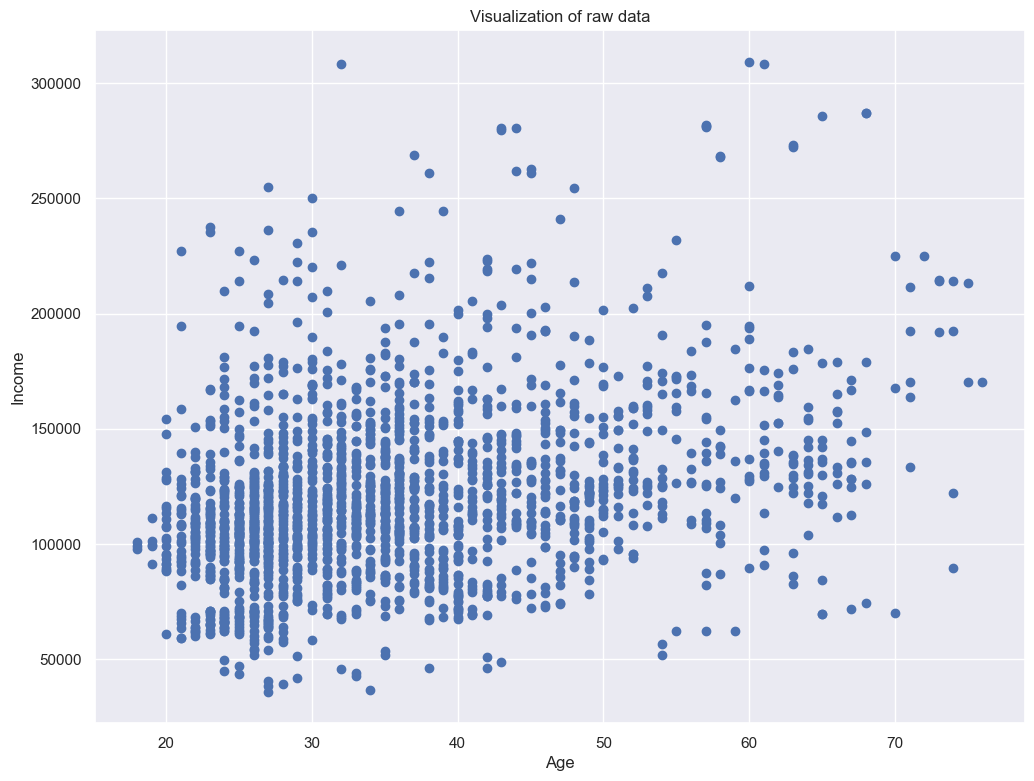

In [147]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [158]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
#scaler = StandardScaler()
#segmentation_std = scaler.fit_transform(df_segmentation)
segmentation_std = df_segmentation_scaled

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Modeling}}$
 </div>

## ${\textbf{Hierarchical Clustering}}$

In [159]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

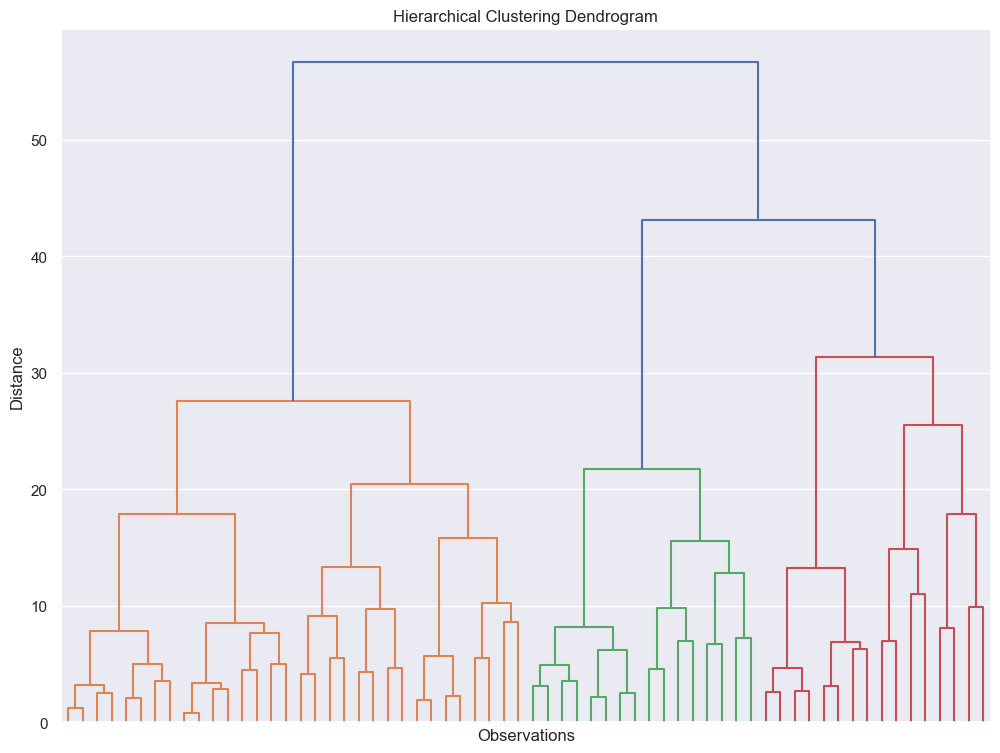

In [160]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## ${\textbf{K-means Clustering}}$

In [161]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

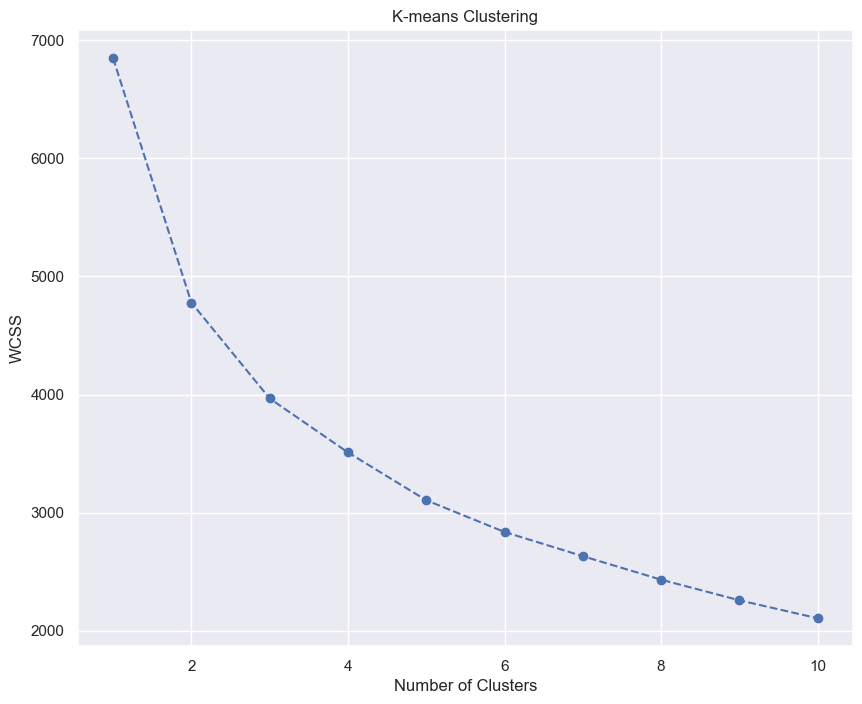

In [162]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [176]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [177]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

### ${\textbf{Results}}$

In [178]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [179]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.482759,0.472414,52.965517,1.762069,120761.896552,0.544828,0.420690
1,0.255144,0.411523,46.530864,1.423868,191841.954733,1.646091,1.510288
2,0.334802,0.475771,31.512482,0.828194,124872.249633,1.104258,1.440529
3,0.615776,0.549618,30.141221,0.833333,95715.382952,0.395674,0.010178


In [180]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [181]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.482759,0.472414,52.965517,1.762069,120761.896552,0.544828,0.420690,290,0.1450
1,0.255144,0.411523,46.530864,1.423868,191841.954733,1.646091,1.510288,243,0.1215
2,0.334802,0.475771,31.512482,0.828194,124872.249633,1.104258,1.440529,681,0.3405
3,0.615776,0.549618,30.141221,0.833333,95715.382952,0.395674,0.010178,786,0.3930


In [182]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.482759,0.472414,52.965517,1.762069,120761.896552,0.544828,0.420690,290,0.1450
fewer-opportunities,0.255144,0.411523,46.530864,1.423868,191841.954733,1.646091,1.510288,243,0.1215
standard,0.334802,0.475771,31.512482,0.828194,124872.249633,1.104258,1.440529,681,0.3405
career focused,0.615776,0.549618,30.141221,0.833333,95715.382952,0.395674,0.010178,786,0.3930


In [183]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

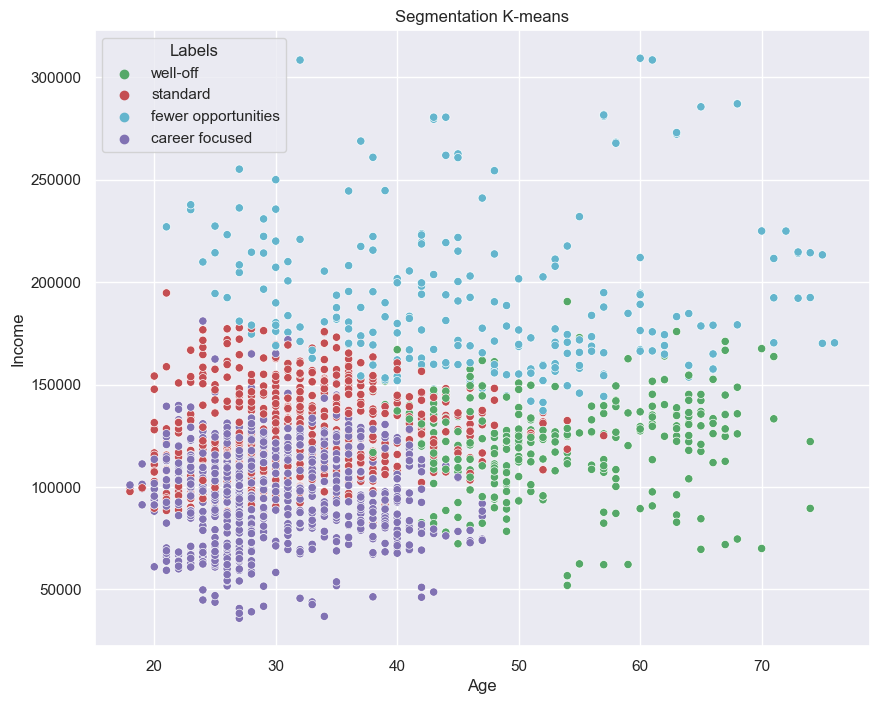

In [184]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y= y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

In [185]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Aplicar k-means con k=3
#kmeans = KMeans(n_clusters=4, random_state=0)
#kmeans.fit(segmentation_std)
labels = kmeans.labels_

# Calcular métricas de evaluación
silhouette = silhouette_score(segmentation_std, labels)
calinski = calinski_harabasz_score(segmentation_std, labels)
davies = davies_bouldin_score(segmentation_std, labels)

# Mostrar resultados
print(f"Coeficiente de silueta: {silhouette:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski:.4f}")
print(f"Índice de Davies-Bouldin: {davies:.4f}")

Coeficiente de silueta: 0.2419
Índice de Calinski-Harabasz: 632.9314
Índice de Davies-Bouldin: 1.3554


### ${\textbf{PCA}}$

In [186]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [187]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [188]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.45189456, 0.2211338 , 0.13514486, 0.10177611, 0.04258652,
       0.03165392, 0.01581023])

Text(0, 0.5, 'Cumulative Explained Variance')

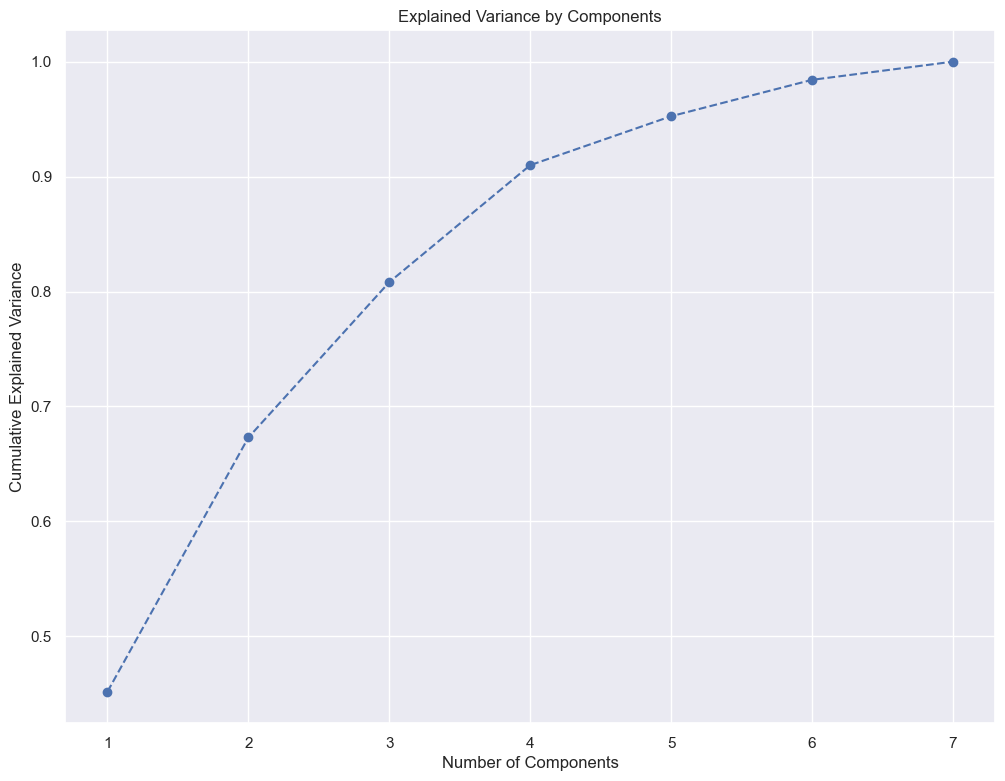

In [189]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [190]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [191]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [192]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.12696249, -0.05580948,  0.31249991,  0.15918207,  0.68933055,
         0.39698778,  0.47433616],
       [ 0.12265092,  0.07401168,  0.7043193 ,  0.54532531, -0.03463413,
        -0.22727265, -0.36494011],
       [ 0.54449546,  0.63043569, -0.36921636,  0.28581901,  0.22560192,
         0.16539981, -0.09904029]])

In [193]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.126962,-0.055809,0.312500,0.159182,0.689331,0.396988,0.474336
Component 2,0.122651,0.074012,0.704319,0.545325,-0.034634,-0.227273,-0.364940
Component 3,0.544495,0.630436,-0.369216,0.285819,0.225602,0.165400,-0.099040


([<matplotlib.axis.YTick at 0x278644dd610>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

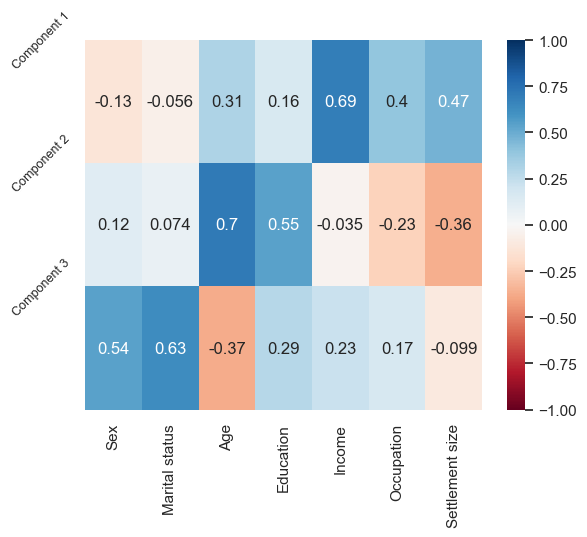

In [194]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [195]:
pca.transform(segmentation_std)

array([[ 1.62334398,  1.38522854, -1.12497751],
       [ 0.78917702, -1.09876467,  1.01751578],
       [-0.86140445,  0.98226533, -1.13302796],
       ...,
       [-1.44352176, -0.40583472, -0.99147546],
       [-1.41560832, -0.00244396,  0.70615938],
       [-1.87530785, -0.67214854, -0.9441929 ]])

In [196]:
scores_pca = pca.transform(segmentation_std)

### ${\textbf{K-means clustering with PCA}}$

In [197]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

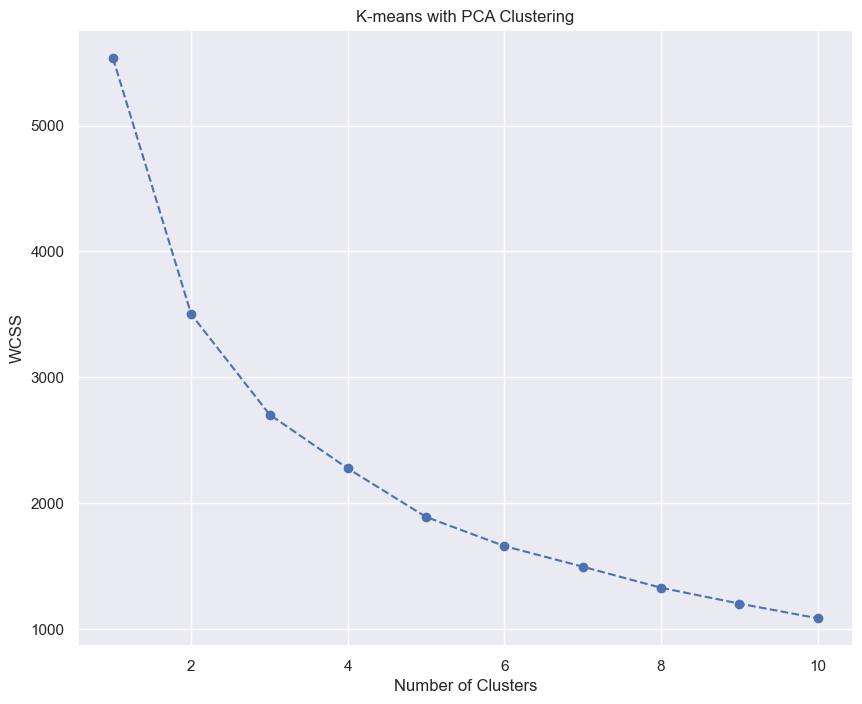

In [198]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [199]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [200]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [201]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [202]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,1.623344,1.385229,-1.124978,1
1,1,1,22,1,150773,1,2,0.789177,-1.098765,1.017516,0
2,0,0,49,1,89210,0,0,-0.861404,0.982265,-1.133028,3
3,0,0,45,1,171565,1,1,1.331467,0.131648,-0.508426,2
4,0,0,53,1,149031,1,1,1.113729,0.526599,-0.831148,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.444660,0.981596,-0.347724,3
1996,1,1,27,1,117744,1,0,-0.618765,-0.105803,0.908125,0
1997,0,0,31,0,86400,0,0,-1.443522,-0.405835,-0.991475,3
1998,1,1,24,1,97968,0,0,-1.415608,-0.002444,0.706159,3


In [203]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.842803,0.928030,28.115530,1.020833,117116.808712,0.946970,0.592803,-0.318797,-0.270417,0.684672
1,0.414179,0.600746,55.324627,1.996269,167073.052239,1.235075,1.205224,1.733078,1.130519,0.119920
2,0.040998,0.162210,35.089127,0.713012,139224.987522,1.229947,1.486631,0.835478,-0.675314,-0.412631
3,0.520995,0.390358,34.931571,0.936236,88943.027994,0.155521,0.012442,-1.189492,0.340050,-0.252191


In [204]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.842803,0.928030,28.115530,1.020833,117116.808712,0.946970,0.592803,-0.318797,-0.270417,0.684672,528,0.2640
career focused,0.414179,0.600746,55.324627,1.996269,167073.052239,1.235075,1.205224,1.733078,1.130519,0.119920,268,0.1340
fewer opportunities,0.040998,0.162210,35.089127,0.713012,139224.987522,1.229947,1.486631,0.835478,-0.675314,-0.412631,561,0.2805
well-off,0.520995,0.390358,34.931571,0.936236,88943.027994,0.155521,0.012442,-1.189492,0.340050,-0.252191,643,0.3215


In [205]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

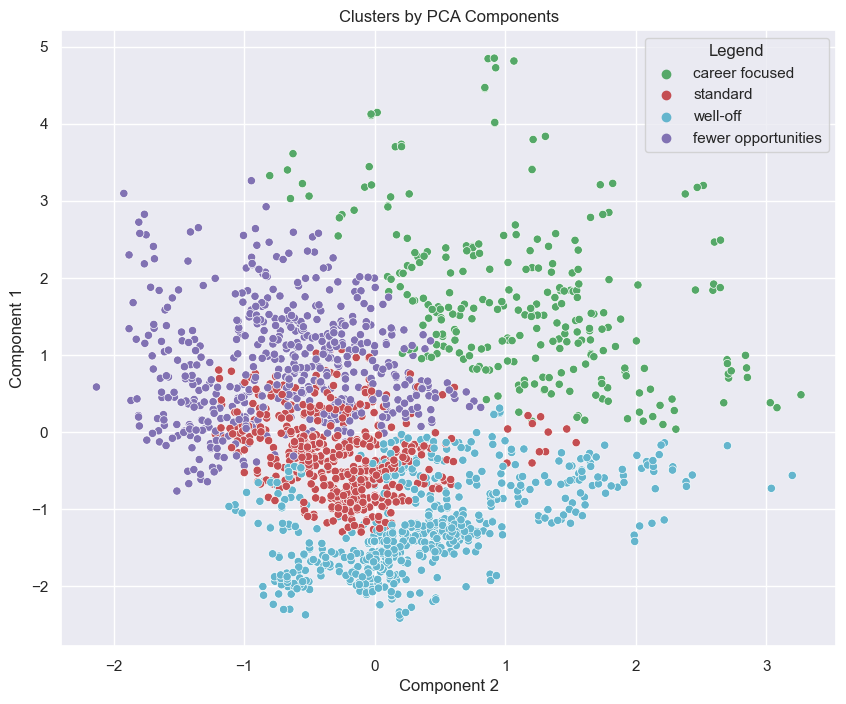

In [207]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [208]:
labels = kmeans_pca.labels_

# Calcular métricas de evaluación
silhouette = silhouette_score(scores_pca, labels)
calinski = calinski_harabasz_score(scores_pca, labels)
davies = davies_bouldin_score(scores_pca, labels)

# Mostrar resultados
print(f"Coeficiente de silueta: {silhouette:.4f}")
print(f"Índice de Calinski-Harabasz: {calinski:.4f}")
print(f"Índice de Davies-Bouldin: {davies:.4f}")

Coeficiente de silueta: 0.2881
Índice de Calinski-Harabasz: 952.8646
Índice de Davies-Bouldin: 1.1535


### ${\textbf{Data Export}}$

In [43]:
# We save the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [44]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [45]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))